In [7]:
import pandas as pd
import csv
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [8]:
dataset = pd.read_csv ('Case Study/dft_traffic_counts_aadf.csv')
dataset

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,35,1787,192,99,72,25,391,216,996,12959
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,149,9592,1167,192,269,403,3799,1788,7619,55977
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,276,5603,1052,140,230,106,508,1186,3222,47203
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,186,7242,629,152,152,37,120,196,1285,55089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,683,2765,127,15,6,3,1,4,156,15628
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,21,3158,346,81,180,36,177,127,948,18804
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,81,643,67,20,30,1,14,9,141,6534
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,79,1309,229,48,54,107,148,107,692,9701


In [9]:
dataset.columns
vehicle_types=list(dataset.columns[-13:-8])
vehicle_types.append('all_hgvs')
vehicle_types.append('all_motor_vehicles')
vehicle_types

['pedal_cycles',
 'two_wheeled_motor_vehicles',
 'cars_and_taxis',
 'buses_and_coaches',
 'lgvs',
 'all_hgvs',
 'all_motor_vehicles']

In [10]:
annual_grouped = dataset.groupby(['year']).sum()
annual_mileage = annual_grouped[vehicle_types]
annual_mileage=annual_mileage/1e6
annual_mileage

,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
year,,,,,,,
2000,1.754959,4.077314,296.893813,4.516376,38.826239,22.585076,366.898818
2001,1.799023,4.303625,301.435905,4.560312,39.714695,22.397091,372.411628
2002,1.757019,4.233551,305.708903,4.583870,40.232893,22.473927,377.233144
2003,2.145188,4.825947,313.770032,4.694011,43.398482,22.708895,389.397366
2004,1.994300,4.429061,317.816701,4.447774,44.953429,23.639895,395.286860
2005,2.079697,4.360031,316.150974,4.474852,46.285452,23.425175,394.696484
2006,2.544887,4.479652,319.646628,4.669477,48.597648,23.449816,400.843219
2007,2.148141,4.439372,315.516520,4.563328,50.791142,23.394892,398.705255
2008,2.560032,4.407334,325.284862,4.679466,51.699497,23.236424,409.304627


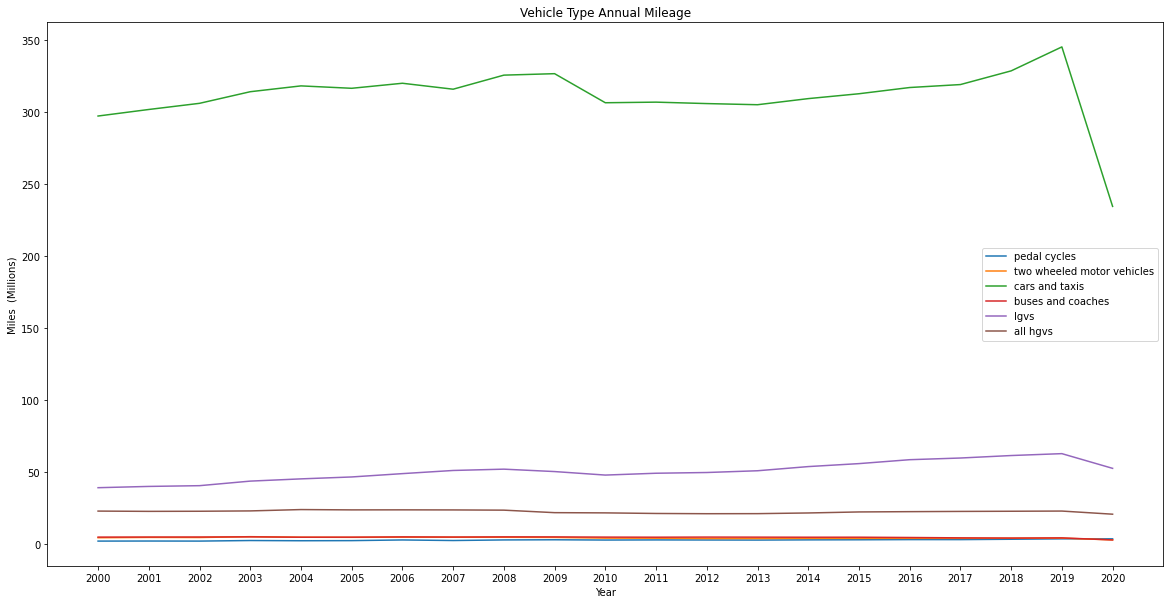

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
for col in vehicle_types[:-1]:
    plt.plot(annual_mileage.index,annual_mileage[col],label=re.sub('_',' ',col))
plt.xticks(np.arange(2000,2021))
#plt.yticks(np.linspace(0,4e8,9))
plt.xlabel('Year')
plt.ylabel('Miles  (Millions)')
plt.title('Vehicle Type Annual Mileage')
plt.legend()
plt.show()

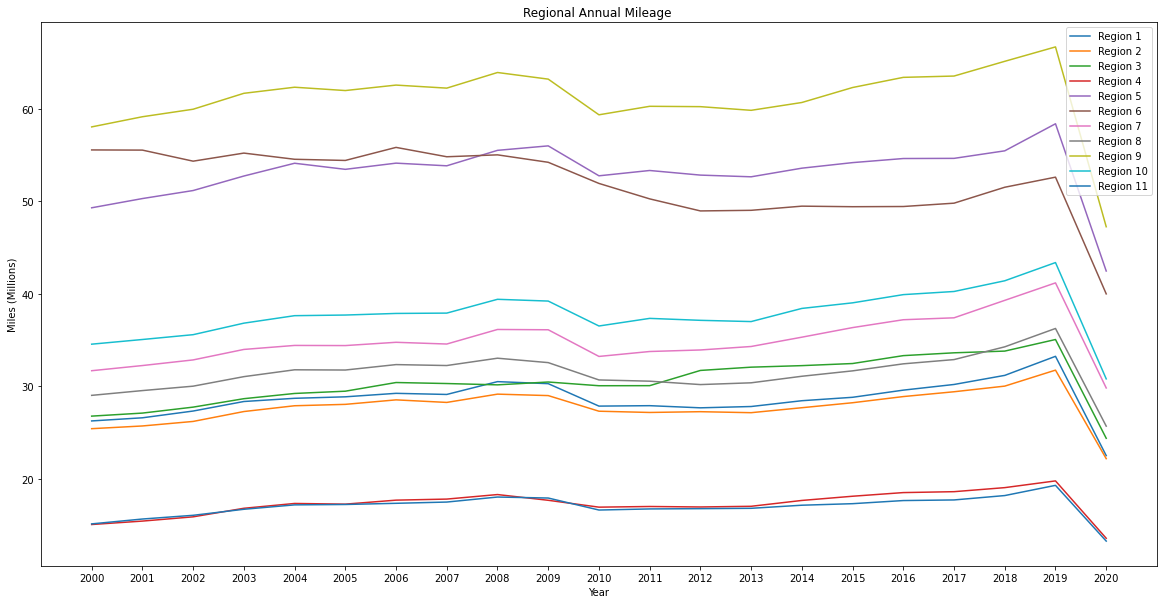

In [12]:
annual_region_mileage = dataset.groupby(['year','region_id']).sum().iloc[:,-1].reset_index()
annual_region_mileage['all_motor_vehicles']=annual_region_mileage['all_motor_vehicles']/1e6
for i in annual_region_mileage.region_id.unique():
    region_df = annual_region_mileage[annual_region_mileage['region_id']==i]
    plt.plot(region_df['year'],region_df['all_motor_vehicles'],label='Region {}'.format(i))
plt.xlabel('Year')
plt.ylabel('Miles (Millions)')
plt.title('Regional Annual Mileage ')
plt.xticks(np.arange(2000,2021))
#plt.yticks(np.linspace(0,7e7,8))
plt.legend()
plt.show()
               

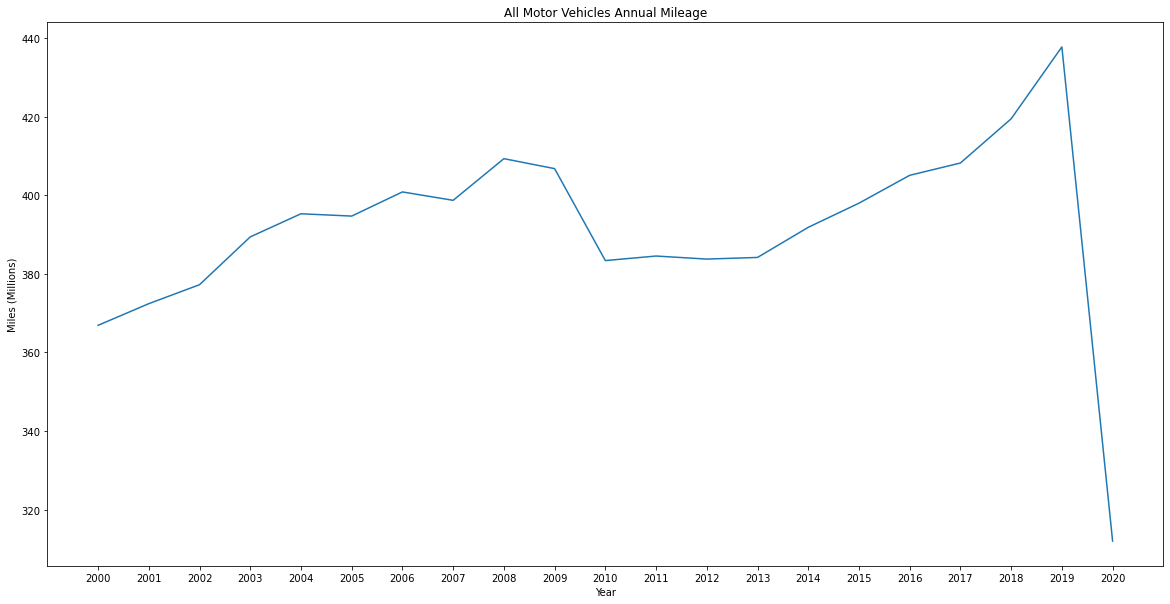

In [13]:
plt.plot(annual_mileage.index,annual_mileage['all_motor_vehicles'])
plt.xticks(np.arange(2000,2021))
#plt.yticks(np.linspace(0,5e8,11))
plt.xlabel('Year')
plt.ylabel('Miles (Millions)')
plt.title('All Motor Vehicles Annual Mileage')
plt.show()

### Forecasting vehicle mileage

In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#Augmented Dicky Fuller Test
result = adfuller(total_mileage[:-1])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('As p-value is greater than 0.05, hence the series is non-stationary')

ADF Statistic: 0.925734
p-value: 0.993417
As p-value is greater than 0.05, hence the series is non-stationary


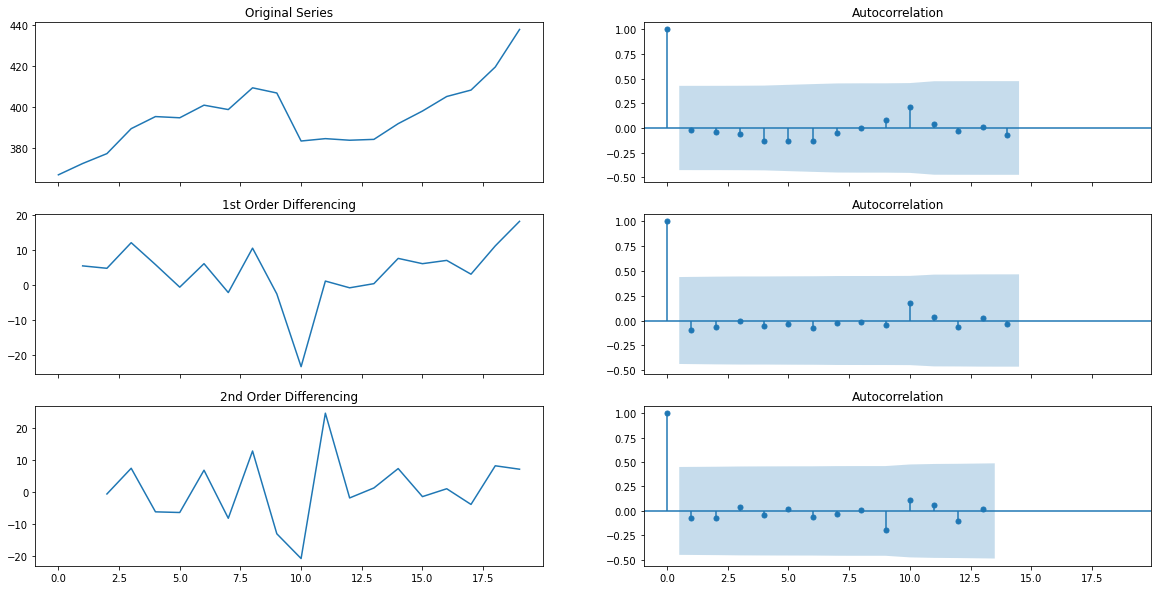

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(total_mileage[:-1]); axes[0, 0].set_title('Original Series')
plot_acf(total_mileage, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(total_mileage[:-1].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(total_mileage.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(total_mileage[:-1].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(total_mileage.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

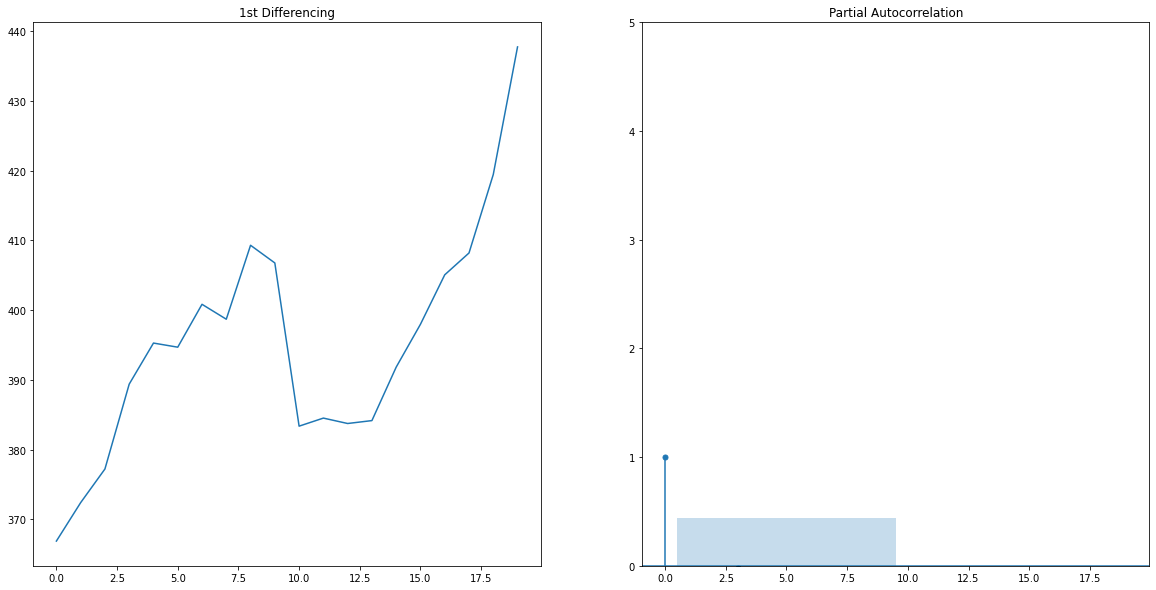

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(total_mileage[:-1]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(total_mileage.diff().dropna(), ax=axes[1],lags=np.arange(0,10))

plt.show()

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(total_mileage[:-1], order=(1,1,2))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.all_motor_vehicles   No. Observations:                   19
Model:                   ARIMA(1, 1, 2)   Log Likelihood                 -65.280
Method:                         css-mle   S.D. of innovations              6.699
Date:                  Fri, 29 Apr 2022   AIC                            140.561
Time:                          16:41:34   BIC                            145.283
Sample:                               1   HQIC                           141.360
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.8265      1.080      2.618      0.009       0.711       4.942
ar.L1.D.all_motor_vehicles     0.5900      0.240      2.454      0.

C:\Users\Chandramoulli\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Chandramoulli\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params 

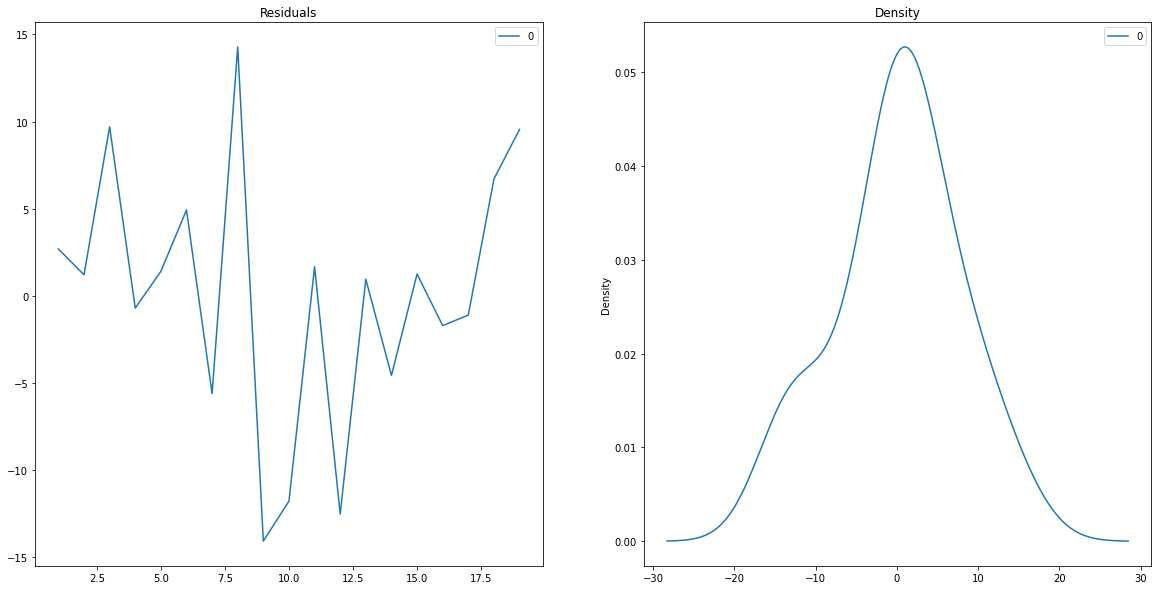

In [19]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

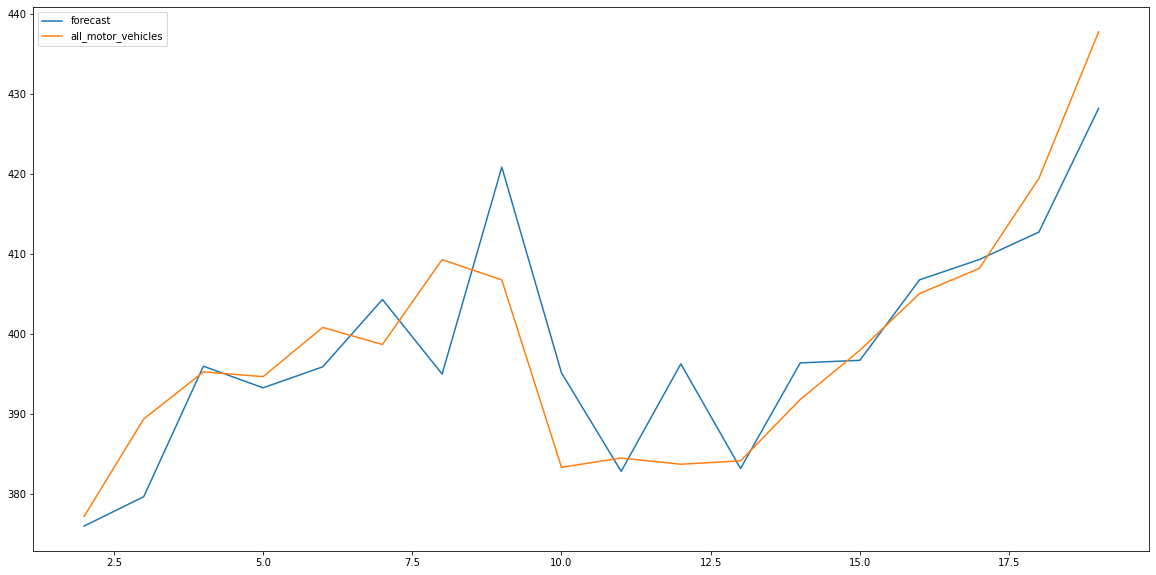

In [20]:
model_fit.plot_predict(dynamic=False)
plt.show()

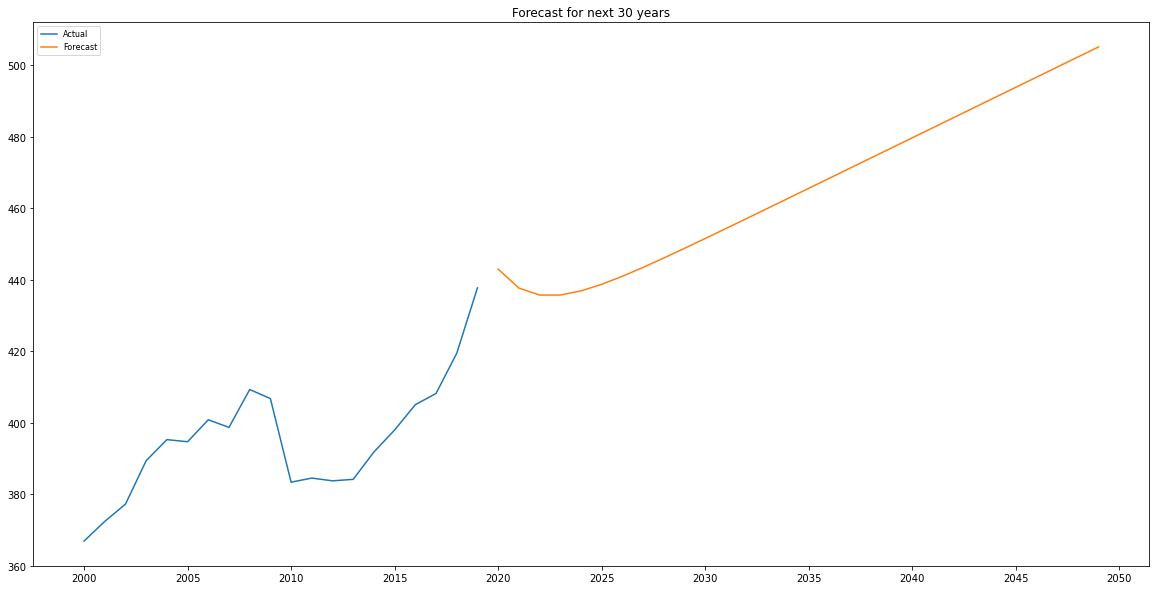

In [21]:
# Forecast

fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=np.arange(2020,2050))
train_series = pd.Series(np.array(total_mileage[:-1]),index=annual_mileage.index[:-1])
#test_series = pd.Series(np.array(total_mileage[-5:-1]),index=annual_mileage.index[-5:-1])
#lower_series = pd.Series(conf[:, 0], index=annual_mileage.index[-5:-1])
#upper_series = pd.Series(conf[:, 1], index=annual_mileage.index[-5:-1])

# Plot
plt.plot(train_series, label='Actual')
#plt.plot(test_series, label='actual')
plt.plot(fc_series, label='Forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.xticks(np.linspace(2000,2050,11))
plt.title('Forecast for next 30 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
electric_proportion = pd.read_csv('Case Study/electric_percent_inversed.csv')
electric_forecast = pd.Series(np.multiply(electric_proportion['electic_percent'][5:].values,fc_series.values)/100,index=np.arange(2020,2050))
electric_forecast

2020      7.048030
2021      9.550671
2022     15.503630
2023     19.808793
2024     30.508782
2025     38.491004
2026     52.566041
2027     65.079887
2028     77.755077
2029     96.708830
2030    122.305777
2031    145.468548
2032    173.369532
2033    204.305926
2034    230.168276
2035    257.216915
2036    286.755800
2037    314.389655
2038    336.802125
2039    359.454834
2040    380.476675
2041    401.711578
2042    420.062611
2043    432.136150
2044    446.231311
2045    458.519087
2046    466.060533
2047    474.597034
2048    483.451301
2049    489.121723
dtype: float64

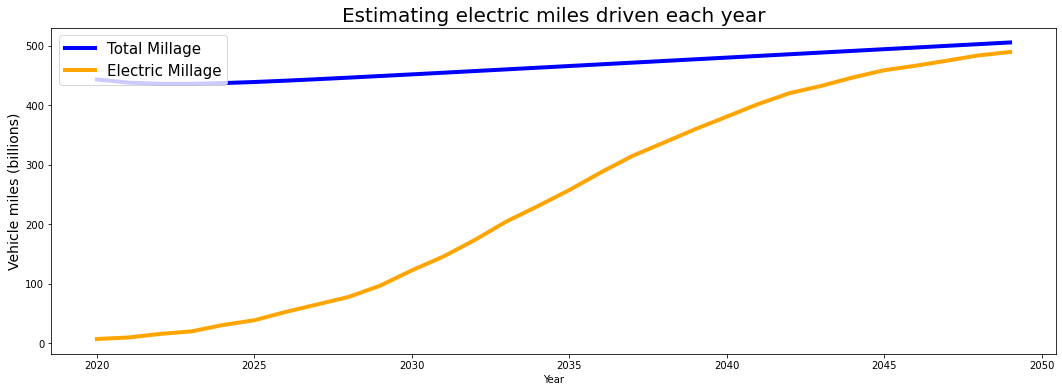

In [24]:
plt.figure(figsize=(18,6))

plt.plot(fc_series, color='blue', linewidth=4.0, label='Total Millage')
plt.plot(electric_forecast, color='orange', linewidth=4.0, label='Electric Millage')

plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Estimating electric miles driven each year', fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.show()

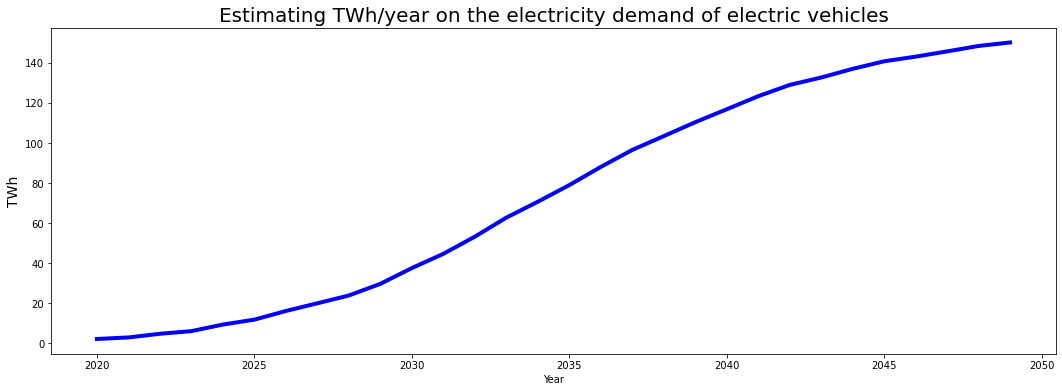

In [25]:
electric_power_consumption = electric_forecast * 307 / 10**3
plt.figure(figsize=(18,6))
plt.plot(electric_power_consumption, linewidth=4.0, color='b')

plt.xlabel('Year')
plt.ylabel('TWh', fontsize=14)
plt.title('Estimating TWh/year on the electricity demand of electric vehicles', fontsize=20)

plt.show()

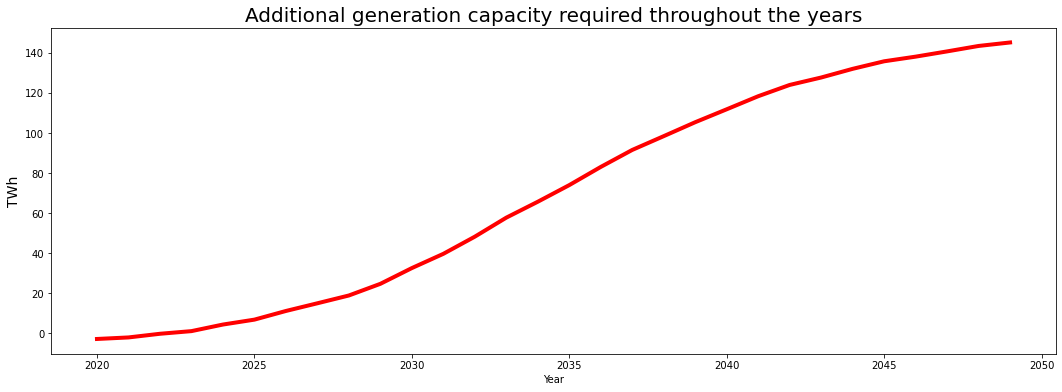

In [26]:
plt.figure(figsize=(18,6))

# The margin amount
energy_margin = 5
plt.plot(electric_power_consumption - energy_margin, linewidth=4.0, color='red')

plt.xlabel('Year')
plt.ylabel('TWh', fontsize=14)
plt.title('Additional generation capacity required throughout the years', fontsize=20)

plt.show()

### Recommendation

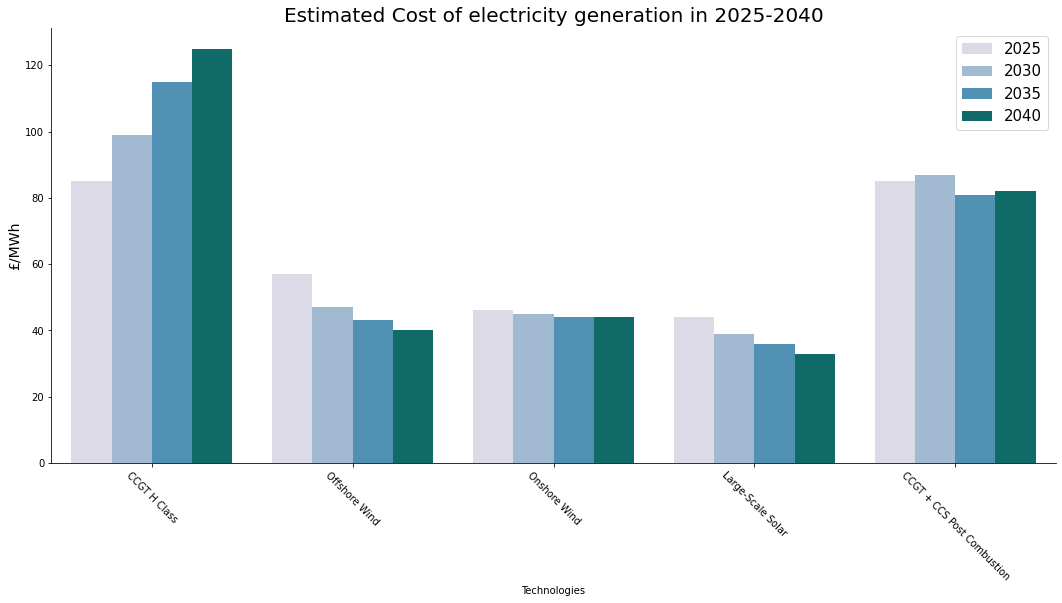

In [27]:
technology_costs = pd.read_csv('Case Study/beis_levelised_costs.csv')

plt.figure(figsize=(18,8))
ax = sns.barplot(x='technology', y='pound_per_mwh', data=technology_costs, hue="year", palette='PuBuGn')
plt.xlabel('Technologies')
plt.ylabel('£/MWh', fontsize=14)
plt.title('Estimated Cost of electricity generation in 2025-2040', fontsize=20)
plt.xticks(rotation=-45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

##### Based on the plot above, this analysis recommends 40% of the energy output to be produced by offshore wind, 20% each by onshore wind, large-scale solar and CCGT+CCS Post Combustion